## AWALAN

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Coffee Shop Sales.csv")

In [4]:
df

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,1/1/2023,7:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,1/1/2023,7:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,1/1/2023,7:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,1/1/2023,7:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,1/1/2023,7:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,6/30/2023,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453,6/30/2023,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454,6/30/2023,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455,6/30/2023,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino


## PRE-PROCESSING

In [6]:
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,1/1/2023,7:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,1/1/2023,7:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,1/1/2023,7:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,1/1/2023,7:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,1/1/2023,7:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    149116 non-null  int64  
 1   transaction_date  149116 non-null  object 
 2   transaction_time  149116 non-null  object 
 3   transaction_qty   149116 non-null  int64  
 4   store_id          149116 non-null  int64  
 5   store_location    149116 non-null  object 
 6   product_id        149116 non-null  int64  
 7   unit_price        149116 non-null  float64
 8   product_category  149116 non-null  object 
 9   product_type      149116 non-null  object 
 10  product_detail    149116 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 12.5+ MB


In [8]:
# Mengubah kolom 'transaction_date' menjadi format datetime tanpa format spesifik
df['transaction_date'] = pd.to_datetime(df['transaction_date'], errors='coerce')

# Cek hasil konversi
print(df['transaction_date'].head())

0   2023-01-01
1   2023-01-01
2   2023-01-01
3   2023-01-01
4   2023-01-01
Name: transaction_date, dtype: datetime64[ns]


In [9]:
# Mengubah kolom 'transaction_time' menjadi tipe data time
df['transaction_time'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S', errors='coerce').dt.time

# Cek hasil konversi
print(df['transaction_time'].head())

0    07:06:11
1    07:08:56
2    07:14:04
3    07:20:24
4    07:22:41
Name: transaction_time, dtype: object


In [10]:
# Memeriksa tipe data untuk setiap kolom
print(df.dtypes)

transaction_id               int64
transaction_date    datetime64[ns]
transaction_time            object
transaction_qty              int64
store_id                     int64
store_location              object
product_id                   int64
unit_price                 float64
product_category            object
product_type                object
product_detail              object
dtype: object


In [11]:
# Mengecek missing values di seluruh dataset
print(df.isnull().sum())

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64


In [12]:
# Memeriksa apakah ada data duplikat berdasarkan 'transaction_id' atau kolom lainnya
duplicates = df[df.duplicated()]

# Menampilkan jumlah dan contoh data duplikat
duplicates

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail


In [13]:
# Menambahkan fitur 'day_of_week' (0=Senin, 6=Minggu)
df['day_of_week'] = df['transaction_date'].dt.dayofweek

# Menambahkan fitur 'month' (1=Januari, 12=Desember)
df['month'] = df['transaction_date'].dt.month

# Menambahkan fitur 'year'
df['year'] = df['transaction_date'].dt.year

# Cek hasil fitur baru
print(df[['transaction_date', 'day_of_week', 'month', 'year']].head())

  transaction_date  day_of_week  month  year
0       2023-01-01            6      1  2023
1       2023-01-01            6      1  2023
2       2023-01-01            6      1  2023
3       2023-01-01            6      1  2023
4       2023-01-01            6      1  2023


In [14]:
# Menambahkan fitur 'total_revenue' (jumlah penjualan * harga unit)
df['total_revenue'] = df['transaction_qty'] * df['unit_price']

# Cek hasil fitur baru
print(df[['transaction_qty', 'unit_price', 'total_revenue']].head())

   transaction_qty  unit_price  total_revenue
0                2         3.0            6.0
1                2         3.1            6.2
2                2         4.5            9.0
3                1         2.0            2.0
4                2         3.1            6.2


In [15]:
# Memeriksa statistik deskriptif untuk kolom numerik
print(df.describe())

       transaction_id               transaction_date  transaction_qty  \
count   149116.000000                         149116    149116.000000   
mean     74737.371872  2023-04-15 11:50:32.173609984         1.438276   
min          1.000000            2023-01-01 00:00:00         1.000000   
25%      37335.750000            2023-03-06 00:00:00         1.000000   
50%      74727.500000            2023-04-24 00:00:00         1.000000   
75%     112094.250000            2023-05-30 00:00:00         2.000000   
max     149456.000000            2023-06-30 00:00:00         8.000000   
std      43153.600016                            NaN         0.542509   

            store_id     product_id     unit_price    day_of_week  \
count  149116.000000  149116.000000  149116.000000  149116.000000   
mean        5.342063      47.918607       3.382219       2.982336   
min         3.000000       1.000000       0.800000       0.000000   
25%         3.000000      33.000000       2.500000       1.000000 

## EDA

In [17]:
# Menambahkan kolom 'time_of_day' untuk mengkategorikan waktu transaksi
def categorize_time_of_day(row):
    if row.hour < 12:
        return 'Pagi'
    elif row.hour < 18:
        return 'Siang'
    else:
        return 'Sore'

# Apply fungsi ke kolom 'transaction_time'
df['time_of_day'] = df['transaction_time'].apply(categorize_time_of_day)

# Cek hasilnya
print(df[['transaction_time', 'time_of_day']].head())

  transaction_time time_of_day
0         07:06:11        Pagi
1         07:08:56        Pagi
2         07:14:04        Pagi
3         07:20:24        Pagi
4         07:22:41        Pagi


In [18]:
# Menghitung total penjualan berdasarkan waktu
sales_by_time_of_day = df.groupby('time_of_day')['total_revenue'].sum().reset_index()

# Tampilkan hasilnya
print(sales_by_time_of_day)

  time_of_day  total_revenue
0        Pagi      388288.67
1       Siang      244855.14
2        Sore       65668.52


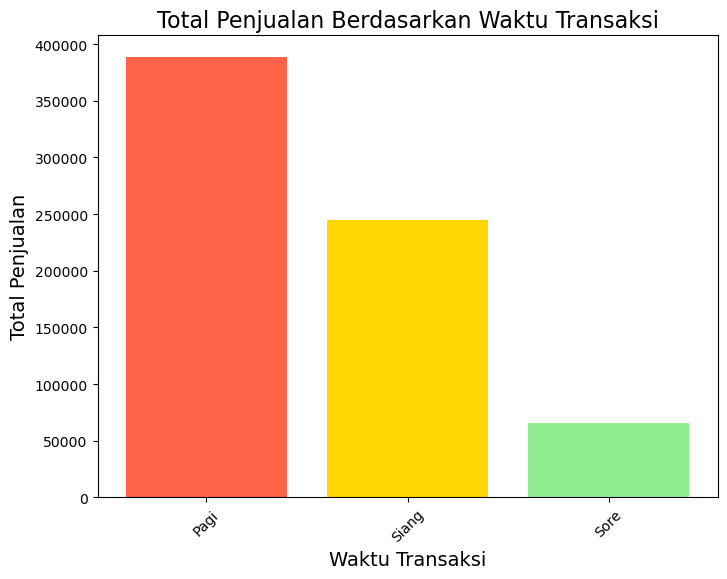

In [19]:
import matplotlib.pyplot as plt

# Membuat bar plot untuk visualisasi
plt.figure(figsize=(8, 6))
plt.bar(sales_by_time_of_day['time_of_day'], sales_by_time_of_day['total_revenue'], color=['#FF6347', '#FFD700', '#90EE90'])
plt.title('Total Penjualan Berdasarkan Waktu Transaksi', fontsize=16)
plt.xlabel('Waktu Transaksi', fontsize=14)
plt.ylabel('Total Penjualan', fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [20]:
# Menghitung total revenue per bulan
monthly_sales = df.groupby('month')['total_revenue'].sum().reset_index()

# Menampilkan hasil
print(monthly_sales)

   month  total_revenue
0      1       81677.74
1      2       76145.19
2      3       98834.68
3      4      118941.08
4      5      156727.76
5      6      166485.88


C:\Users\raiha\AppData\Local\Temp\ipykernel_12720\3968215433.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='total_revenue', data=monthly_sales, hue=None, palette='viridis')


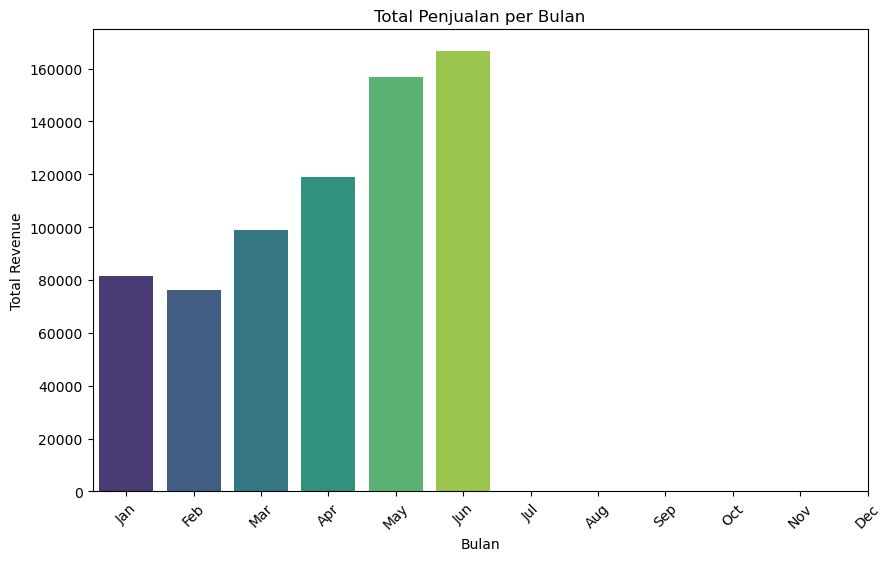

In [21]:
# Membuat bar plot untuk total revenue per bulan dengan hue None
plt.figure(figsize=(10,6))
sns.barplot(x='month', y='total_revenue', data=monthly_sales, hue=None, palette='viridis')
plt.title('Total Penjualan per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Revenue')
plt.xticks(ticks=range(6), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'], rotation=45)
plt.show()

C:\Users\raiha\AppData\Local\Temp\ipykernel_12720\2079326932.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_revenue', y='product_category', data=category_sales, palette='Blues_d')


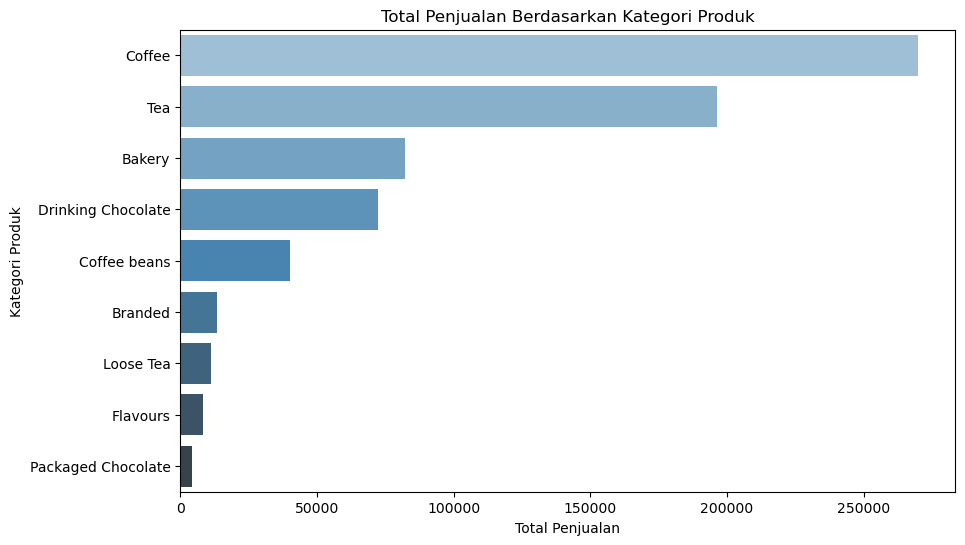

In [22]:
# Mengelompokkan penjualan berdasarkan kategori produk
category_sales = df.groupby('product_category').agg({'total_revenue': 'sum'}).reset_index()

# Menampilkan kategori produk dengan penjualan tertinggi
category_sales = category_sales.sort_values(by='total_revenue', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='total_revenue', y='product_category', data=category_sales, palette='Blues_d')
plt.title('Total Penjualan Berdasarkan Kategori Produk')
plt.xlabel('Total Penjualan')
plt.ylabel('Kategori Produk')
plt.show()

C:\Users\raiha\AppData\Local\Temp\ipykernel_12720\156092813.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_revenue', y='store_location', data=location_sales, palette='Greens_d')


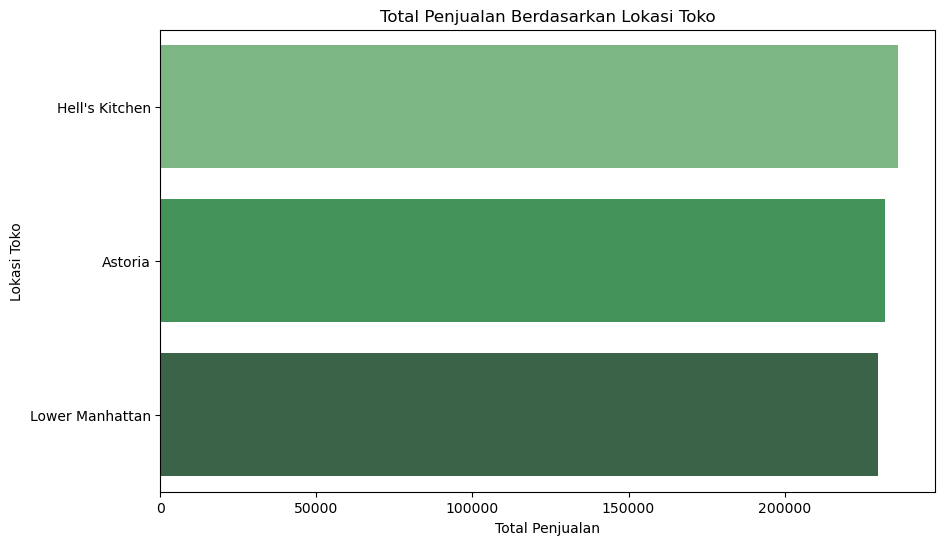

In [23]:
# Mengelompokkan penjualan berdasarkan lokasi toko
location_sales = df.groupby('store_location').agg({'total_revenue': 'sum'}).reset_index()

# Menampilkan lokasi toko dengan penjualan tertinggi
location_sales = location_sales.sort_values(by='total_revenue', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='total_revenue', y='store_location', data=location_sales, palette='Greens_d')
plt.title('Total Penjualan Berdasarkan Lokasi Toko')
plt.xlabel('Total Penjualan')
plt.ylabel('Lokasi Toko')
plt.show()

C:\Users\raiha\AppData\Local\Temp\ipykernel_12720\2842112158.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_name', y='total_revenue', data=day_of_week_sales, palette='coolwarm')


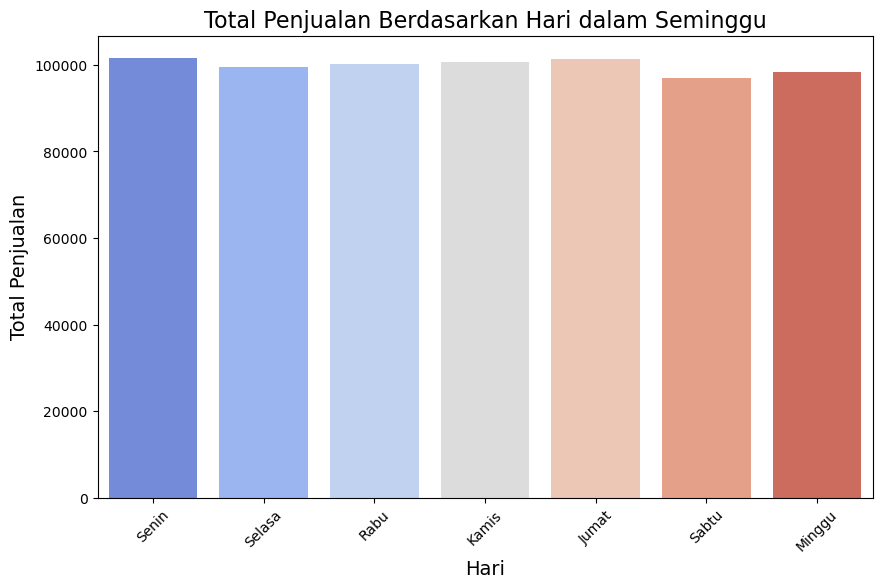

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Menambahkan kolom 'day_of_week' ke dataset
df['day_of_week'] = df['transaction_date'].dt.dayofweek

# Mengelompokkan penjualan berdasarkan hari dalam seminggu
day_of_week_sales = df.groupby('day_of_week')['total_revenue'].sum().reset_index()

# Menambahkan label hari ke dalam data (0 = Senin, 6 = Minggu)
days = ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu']
day_of_week_sales['day_name'] = day_of_week_sales['day_of_week'].apply(lambda x: days[x])

# Mengurutkan data berdasarkan urutan hari dalam seminggu
day_of_week_sales = day_of_week_sales.sort_values(by='day_of_week')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='day_name', y='total_revenue', data=day_of_week_sales, palette='coolwarm')
plt.title('Total Penjualan Berdasarkan Hari dalam Seminggu', fontsize=16)
plt.xlabel('Hari', fontsize=14)
plt.ylabel('Total Penjualan', fontsize=14)
plt.xticks(rotation=45)
plt.show()

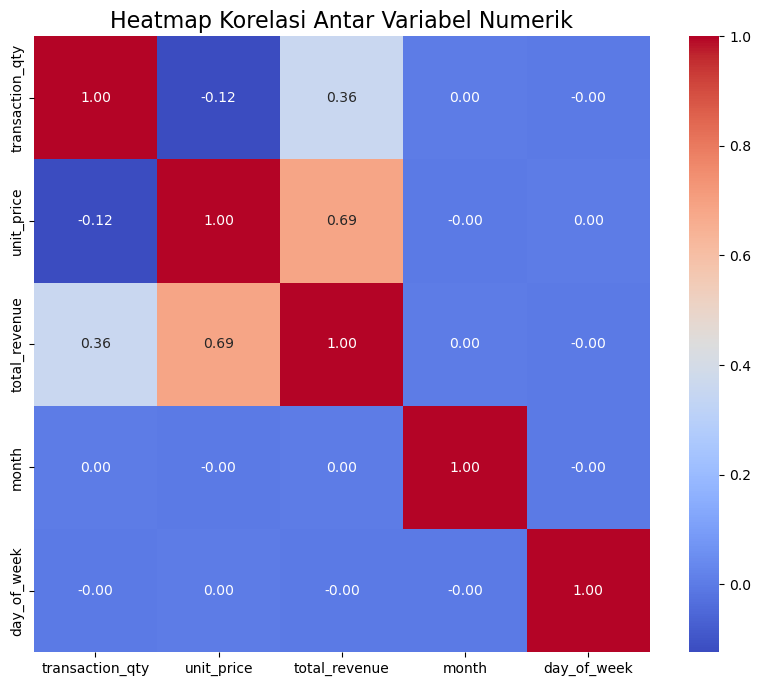

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Memilih kolom numerik untuk analisis korelasi
numerical_columns = ['transaction_qty', 'unit_price', 'total_revenue', 'month', 'day_of_week']

# Menghitung matriks korelasi
correlation_matrix = df[numerical_columns].corr()

# Membuat heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title('Heatmap Korelasi Antar Variabel Numerik', fontsize=16)
plt.show()

C:\Users\raiha\AppData\Local\Temp\ipykernel_12720\213117243.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_type', y='total_revenue', data=day_type_sales, palette='coolwarm')


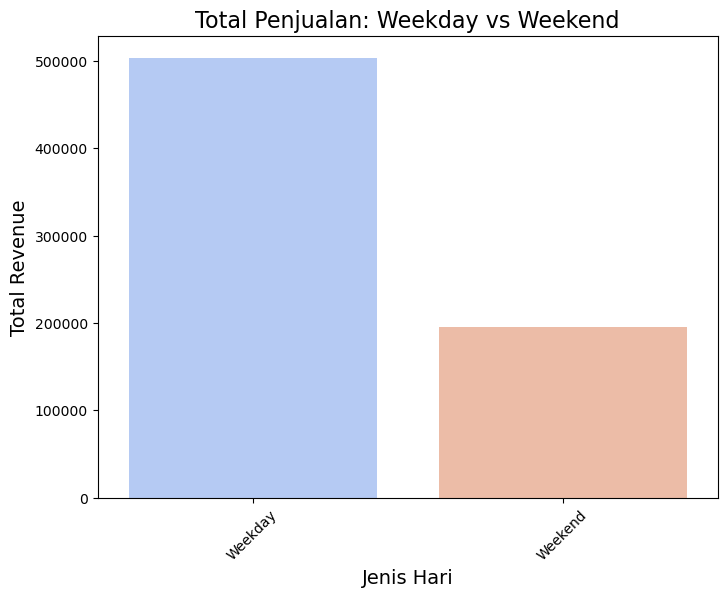

(count     130.000000
 mean     3873.750308
 std      1189.138492
 min      2203.400000
 25%      2848.200000
 50%      3537.980000
 75%      4846.415000
 max      6403.910000
 Name: total_revenue, dtype: float64,
 count      51.000000
 mean     3827.937059
 std      1195.628998
 min      2037.100000
 25%      2879.740000
 50%      3408.360000
 75%      4779.105000
 max      6117.600000
 Name: total_revenue, dtype: float64)

In [26]:


# Redoing the earlier preprocessing
df['transaction_date'] = pd.to_datetime(df['transaction_date'], errors='coerce')
df['transaction_time'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S', errors='coerce').dt.time
df['day_of_week'] = df['transaction_date'].dt.dayofweek
df['month'] = df['transaction_date'].dt.month
df['year'] = df['transaction_date'].dt.year
df['total_revenue'] = df['transaction_qty'] * df['unit_price']

# Analyzing weekday vs weekend sales
df['day_type'] = df['day_of_week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')
day_type_sales = df.groupby('day_type')['total_revenue'].sum().reset_index()

daily_day_type_sales = df.groupby(['transaction_date', 'day_type']).agg({'total_revenue': 'sum'}).reset_index()

weekday_stats = daily_day_type_sales[daily_day_type_sales['day_type'] == 'Weekday']['total_revenue'].describe()
weekend_stats = daily_day_type_sales[daily_day_type_sales['day_type'] == 'Weekend']['total_revenue'].describe()

# Visualizing total sales by day type
plt.figure(figsize=(8, 6))
sns.barplot(x='day_type', y='total_revenue', data=day_type_sales, palette='coolwarm')
plt.title('Total Penjualan: Weekday vs Weekend', fontsize=16)
plt.xlabel('Jenis Hari', fontsize=14)
plt.ylabel('Total Revenue', fontsize=14)
plt.xticks(rotation=45)
plt.show()

# Displaying descriptive statistics for Weekday and Weekend
weekday_stats, weekend_stats

C:\Users\raiha\AppData\Local\Temp\ipykernel_12720\391976003.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekend_data['time_of_day'] = weekend_data['transaction_time'].apply(categorize_time_of_day)
C:\Users\raiha\AppData\Local\Temp\ipykernel_12720\391976003.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='time_of_day', y='total_revenue', data=weekend_sales_by_time, palette='viridis')


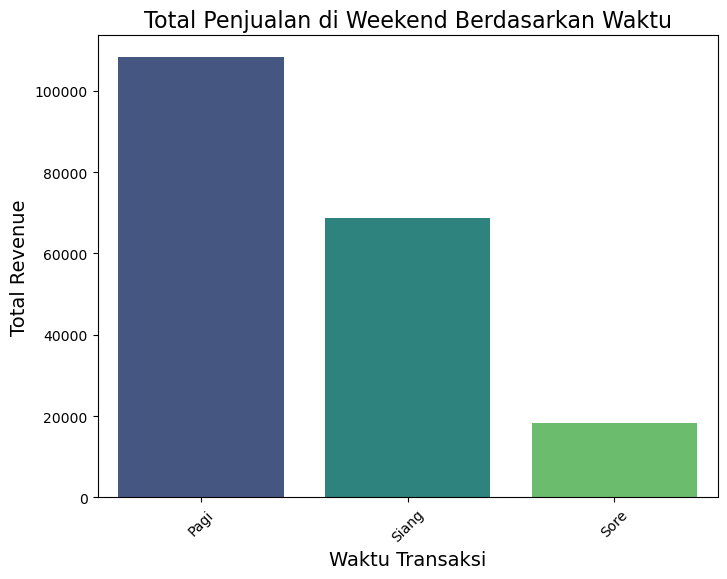

,time_of_day,total_revenue
0,Pagi,108210.32
1,Siang,68779.41
2,Sore,18235.06


In [27]:
# Mengelompokkan data hanya untuk weekend
weekend_data = df[df['day_type'] == 'Weekend']

# Menambahkan kolom untuk kategori waktu transaksi
def categorize_time_of_day(time):
    if time.hour < 12:
        return 'Pagi'
    elif time.hour < 18:
        return 'Siang'
    else:
        return 'Sore'

# Apply fungsi untuk weekend data
weekend_data['time_of_day'] = weekend_data['transaction_time'].apply(categorize_time_of_day)

# Menghitung total penjualan berdasarkan kategori waktu di weekend
weekend_sales_by_time = weekend_data.groupby('time_of_day')['total_revenue'].sum().reset_index()

# Mengurutkan kategori waktu untuk visualisasi
time_order = ['Pagi', 'Siang', 'Sore']
weekend_sales_by_time['time_of_day'] = pd.Categorical(weekend_sales_by_time['time_of_day'], categories=time_order, ordered=True)
weekend_sales_by_time = weekend_sales_by_time.sort_values(by='time_of_day')

# Visualisasi pola penjualan di weekend berdasarkan waktu
plt.figure(figsize=(8, 6))
sns.barplot(x='time_of_day', y='total_revenue', data=weekend_sales_by_time, palette='viridis')
plt.title('Total Penjualan di Weekend Berdasarkan Waktu', fontsize=16)
plt.xlabel('Waktu Transaksi', fontsize=14)
plt.ylabel('Total Revenue', fontsize=14)
plt.xticks(rotation=45)
plt.show()

# Menampilkan hasil perhitungan total penjualan per waktu
weekend_sales_by_time

C:\Users\raiha\AppData\Local\Temp\ipykernel_12720\1862655222.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='transaction_qty', y='product_category', data=weekend_category_sales, palette='coolwarm')


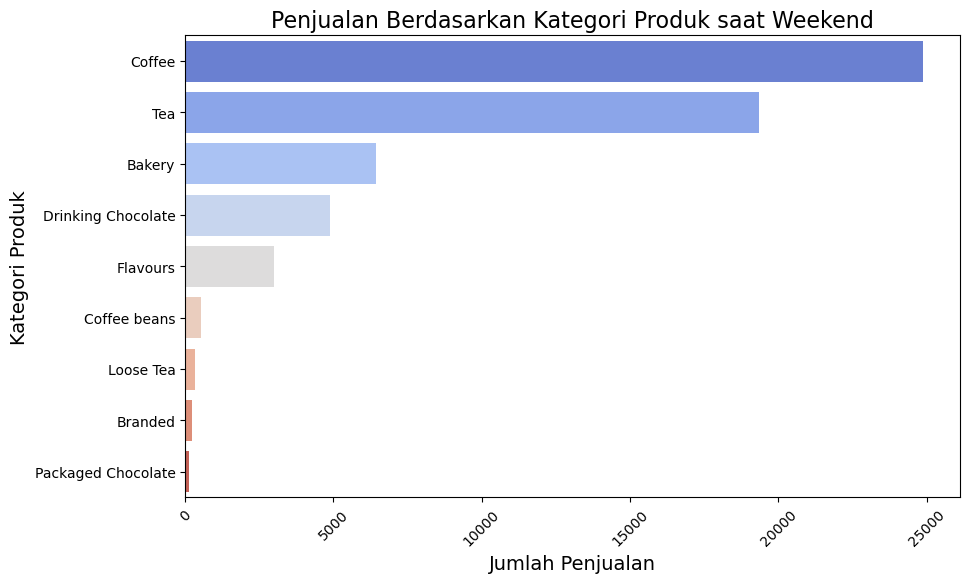

,product_category,transaction_qty
2,Coffee,24882
8,Tea,19360
0,Bakery,6449
4,Drinking Chocolate,4874
5,Flavours,3003
3,Coffee beans,523
6,Loose Tea,337
1,Branded,226
7,Packaged Chocolate,142


In [28]:
# Menghitung total penjualan berdasarkan kategori produk saat weekend
weekend_category_sales = weekend_data.groupby('product_category').agg({'transaction_qty': 'sum'}).reset_index()

# Mengurutkan kategori berdasarkan jumlah penjualan tertinggi
weekend_category_sales = weekend_category_sales.sort_values(by='transaction_qty', ascending=False)

# Visualisasi kategori dengan penjualan tertinggi saat weekend
plt.figure(figsize=(10, 6))
sns.barplot(x='transaction_qty', y='product_category', data=weekend_category_sales, palette='coolwarm')
plt.title('Penjualan Berdasarkan Kategori Produk saat Weekend', fontsize=16)
plt.xlabel('Jumlah Penjualan', fontsize=14)
plt.ylabel('Kategori Produk', fontsize=14)
plt.xticks(rotation=45)
plt.show()

# Menampilkan data penjualan per kategori
weekend_category_sales

C:\Users\raiha\AppData\Local\Temp\ipykernel_12720\2902625311.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='transaction_qty', y='product_category', data=weekday_category_sales, palette='coolwarm')


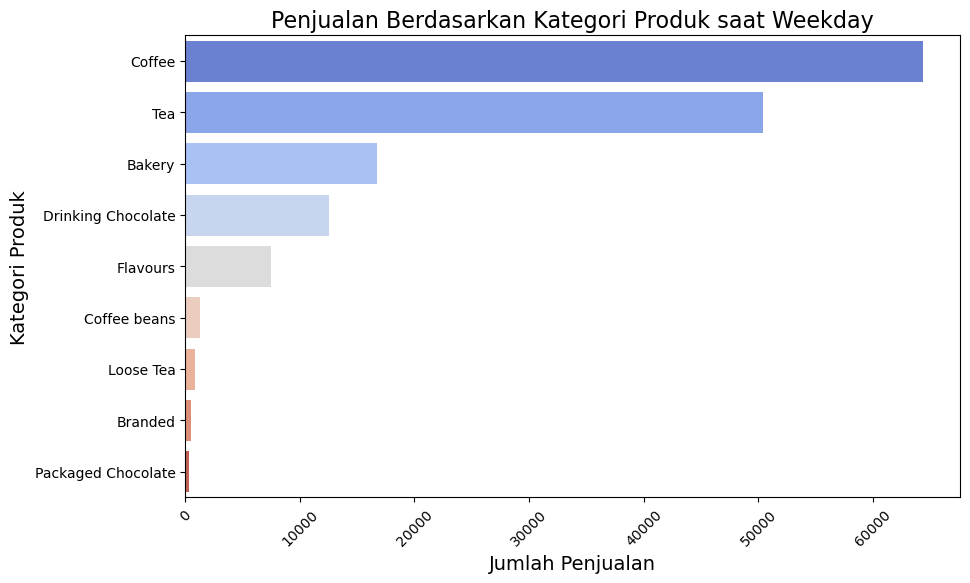

,product_category,transaction_qty
2,Coffee,64368
8,Tea,50377
0,Bakery,16765
4,Drinking Chocolate,12583
5,Flavours,7508
3,Coffee beans,1305
6,Loose Tea,873
1,Branded,550
7,Packaged Chocolate,345


In [29]:
# Menghitung total penjualan berdasarkan kategori produk saat weekday
weekday_data = df[df['day_type'] == 'Weekday']
weekday_category_sales = weekday_data.groupby('product_category').agg({'transaction_qty': 'sum'}).reset_index()

# Mengurutkan kategori berdasarkan jumlah penjualan tertinggi
weekday_category_sales = weekday_category_sales.sort_values(by='transaction_qty', ascending=False)

# Visualisasi kategori dengan penjualan tertinggi saat weekday
plt.figure(figsize=(10, 6))
sns.barplot(x='transaction_qty', y='product_category', data=weekday_category_sales, palette='coolwarm')
plt.title('Penjualan Berdasarkan Kategori Produk saat Weekday', fontsize=16)
plt.xlabel('Jumlah Penjualan', fontsize=14)
plt.ylabel('Kategori Produk', fontsize=14)
plt.xticks(rotation=45)
plt.show()

# Menampilkan data penjualan per kategori untuk weekday
weekday_category_sales

<Figure size 1200x800 with 0 Axes>

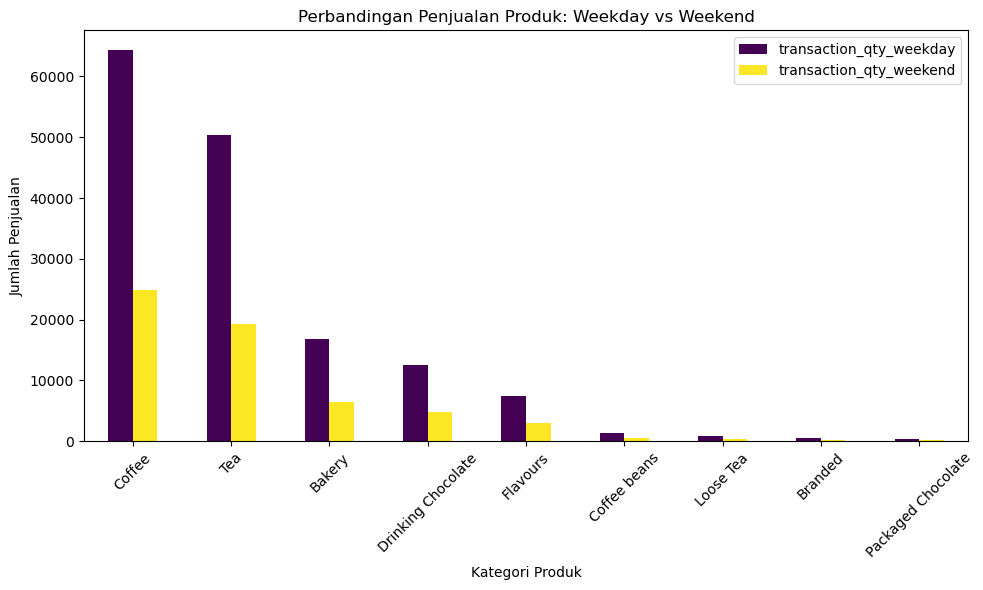

,product_category,transaction_qty_weekday,transaction_qty_weekend,difference
0,Coffee,64368,24882,39486
1,Tea,50377,19360,31017
2,Bakery,16765,6449,10316
3,Drinking Chocolate,12583,4874,7709
4,Flavours,7508,3003,4505
5,Coffee beans,1305,523,782
6,Loose Tea,873,337,536
7,Branded,550,226,324
8,Packaged Chocolate,345,142,203


In [30]:
# Menggabungkan data penjualan weekday dan weekend berdasarkan kategori
comparison_sales = weekday_category_sales.merge(
    weekend_category_sales, on='product_category', suffixes=('_weekday', '_weekend')
)

# Menghitung perbedaan penjualan antara weekday dan weekend
comparison_sales['difference'] = comparison_sales['transaction_qty_weekday'] - comparison_sales['transaction_qty_weekend']

# Visualisasi perbandingan penjualan weekday vs weekend
comparison_sales_sorted = comparison_sales.sort_values(by='transaction_qty_weekday', ascending=False)

plt.figure(figsize=(12, 8))
comparison_sales_sorted.plot(
    x='product_category', 
    kind='bar', 
    stacked=False,
    figsize=(10, 6),
    y=['transaction_qty_weekday', 'transaction_qty_weekend'],
    title='Perbandingan Penjualan Produk: Weekday vs Weekend',
    xlabel='Kategori Produk',
    ylabel='Jumlah Penjualan',
    colormap='viridis'
)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Menampilkan data perbandingan
comparison_sales_sorted

<Figure size 1200x800 with 0 Axes>

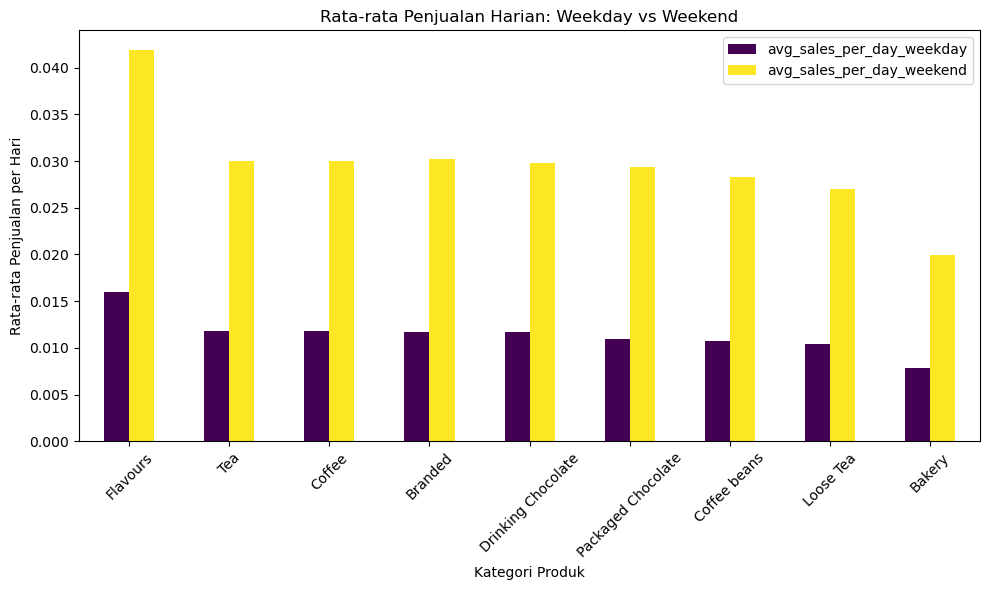

,product_category,avg_sales_per_day_weekday,avg_sales_per_day_weekend,difference
5,Flavours,0.015949,0.041901,-0.025952
8,Tea,0.011812,0.030030,-0.018218
2,Coffee,0.011749,0.029979,-0.018230
1,Branded,0.011726,0.030214,-0.018488
4,Drinking Chocolate,0.011724,0.029754,-0.018030
7,Packaged Chocolate,0.010989,0.029412,-0.018423
3,Coffee beans,0.010737,0.028270,-0.017533
6,Loose Tea,0.010417,0.027027,-0.016610
0,Bakery,0.007838,0.019936,-0.012097


In [31]:
# Menghitung rata-rata penjualan per hari untuk weekday dan weekend
weekday_avg_sales = weekday_data.groupby('product_category').agg(
    avg_sales_per_day=('transaction_qty', 'mean'),
    total_days=('transaction_date', 'nunique')
).reset_index()
weekday_avg_sales['avg_sales_per_day'] /= weekday_avg_sales['total_days']

weekend_avg_sales = weekend_data.groupby('product_category').agg(
    avg_sales_per_day=('transaction_qty', 'mean'),
    total_days=('transaction_date', 'nunique')
).reset_index()
weekend_avg_sales['avg_sales_per_day'] /= weekend_avg_sales['total_days']

# Menggabungkan rata-rata penjualan weekday dan weekend
avg_comparison_sales = weekday_avg_sales[['product_category', 'avg_sales_per_day']].merge(
    weekend_avg_sales[['product_category', 'avg_sales_per_day']],
    on='product_category',
    suffixes=('_weekday', '_weekend')
)

# Menghitung perbedaan rata-rata penjualan
avg_comparison_sales['difference'] = (
    avg_comparison_sales['avg_sales_per_day_weekday'] - avg_comparison_sales['avg_sales_per_day_weekend']
)

# Visualisasi rata-rata penjualan per hari
plt.figure(figsize=(12, 8))
avg_comparison_sales_sorted = avg_comparison_sales.sort_values(by='avg_sales_per_day_weekday', ascending=False)
avg_comparison_sales_sorted.plot(
    x='product_category', 
    kind='bar', 
    stacked=False,
    figsize=(10, 6),
    y=['avg_sales_per_day_weekday', 'avg_sales_per_day_weekend'],
    title='Rata-rata Penjualan Harian: Weekday vs Weekend',
    xlabel='Kategori Produk',
    ylabel='Rata-rata Penjualan per Hari',
    colormap='viridis'
)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Menampilkan data rata-rata penjualan
avg_comparison_sales_sorted

<Figure size 1200x800 with 0 Axes>

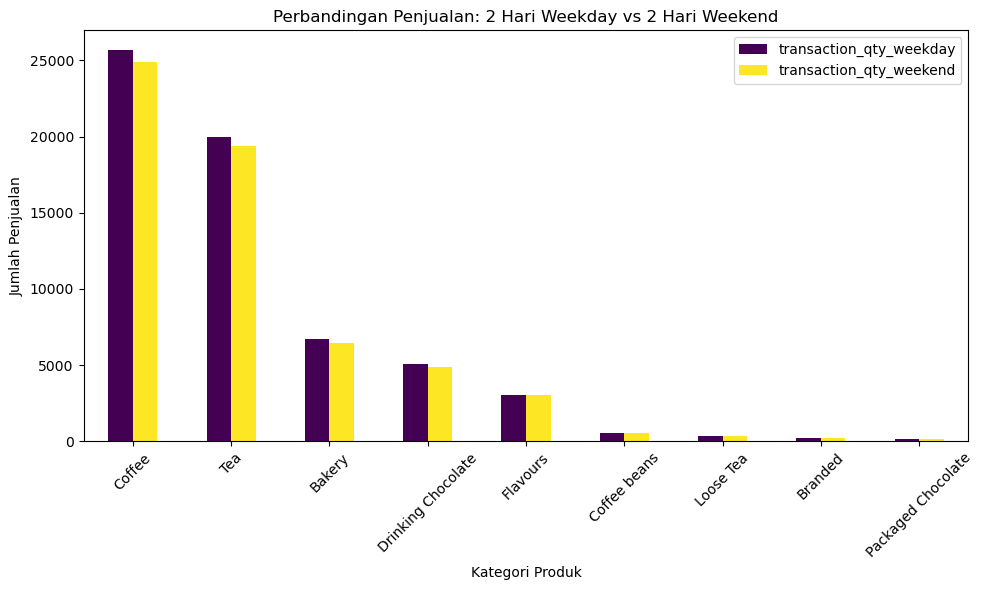

,product_category,transaction_qty_weekday,transaction_qty_weekend
2,Coffee,25694,24882
8,Tea,19956,19360
0,Bakery,6711,6449
4,Drinking Chocolate,5046,4874
5,Flavours,3059,3003
3,Coffee beans,533,523
6,Loose Tea,339,337
1,Branded,211,226
7,Packaged Chocolate,131,142


In [32]:
# Filter data untuk 2 hari weekday (Senin dan Selasa) dan 2 hari weekend (Sabtu dan Minggu)
selected_weekday = df[df['day_of_week'].isin([0, 1])]  # Senin (0) dan Selasa (1)
selected_weekend = df[df['day_of_week'].isin([5, 6])]  # Sabtu (5) dan Minggu (6)

# Hitung total penjualan per kategori untuk 2 hari weekday dan 2 hari weekend
weekday_2day_sales = selected_weekday.groupby('product_category').agg({'transaction_qty': 'sum'}).reset_index()
weekend_2day_sales = selected_weekend.groupby('product_category').agg({'transaction_qty': 'sum'}).reset_index()

# Gabungkan data untuk perbandingan
comparison_2day_sales = weekday_2day_sales.merge(
    weekend_2day_sales, on='product_category', suffixes=('_weekday', '_weekend')
)

# Visualisasi perbandingan penjualan
plt.figure(figsize=(12, 8))
comparison_2day_sales_sorted = comparison_2day_sales.sort_values(by='transaction_qty_weekday', ascending=False)
comparison_2day_sales_sorted.plot(
    x='product_category', 
    kind='bar', 
    stacked=False,
    figsize=(10, 6),
    y=['transaction_qty_weekday', 'transaction_qty_weekend'],
    title='Perbandingan Penjualan: 2 Hari Weekday vs 2 Hari Weekend',
    xlabel='Kategori Produk',
    ylabel='Jumlah Penjualan',
    colormap='viridis'
)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Menampilkan data perbandingan penjualan
comparison_2day_sales_sorted

Langkah Strategis untuk Meningkatkan Penjualan di Akhir Pekan:
Promosi Spesial Weekend:
Diskon untuk keluarga atau penawaran beli satu gratis satu pada waktu tertentu.
Produk Eksklusif Weekend:
Menawarkan menu khusus yang hanya tersedia di akhir pekan untuk menarik pelanggan.
Kegiatan Sosial atau Acara:
Mengadakan event kecil seperti live music atau diskon khusus untuk pelanggan yang dine-in di toko.

1. Rutinitas Konsumen:
Weekday: Pelanggan cenderung membeli sebagai bagian dari rutinitas harian sebelum bekerja (kopi atau teh pagi) atau selama jam makan siang.
Weekend: Rutinitas pagi tidak seketat weekday, sehingga pembelian mungkin hanya dari pelanggan yang keluar untuk rekreasi atau aktivitas sosial.
2. Volume Pelanggan:
Weekday memiliki potensi volume pelanggan lebih besar karena kegiatan kerja dan kunjungan pelanggan reguler ke lokasi seperti perkantoran, kampus, atau pusat kota.
Weekend lebih mengandalkan pelanggan santai, yang jumlahnya mungkin lebih kecil dibandingkan weekday.

## ANALISIS PENJUALAN HARIAN

In [35]:
# Mengelompokkan data berdasarkan tanggal transaksi dan menghitung total revenue harian
daily_sales = df.groupby('transaction_date').agg({'total_revenue': 'sum'}).reset_index()

# Menampilkan hasil
print(daily_sales.head())

  transaction_date  total_revenue
0       2023-01-01        2508.20
1       2023-01-02        2403.35
2       2023-01-03        2565.00
3       2023-01-04        2220.10
4       2023-01-05        2418.85


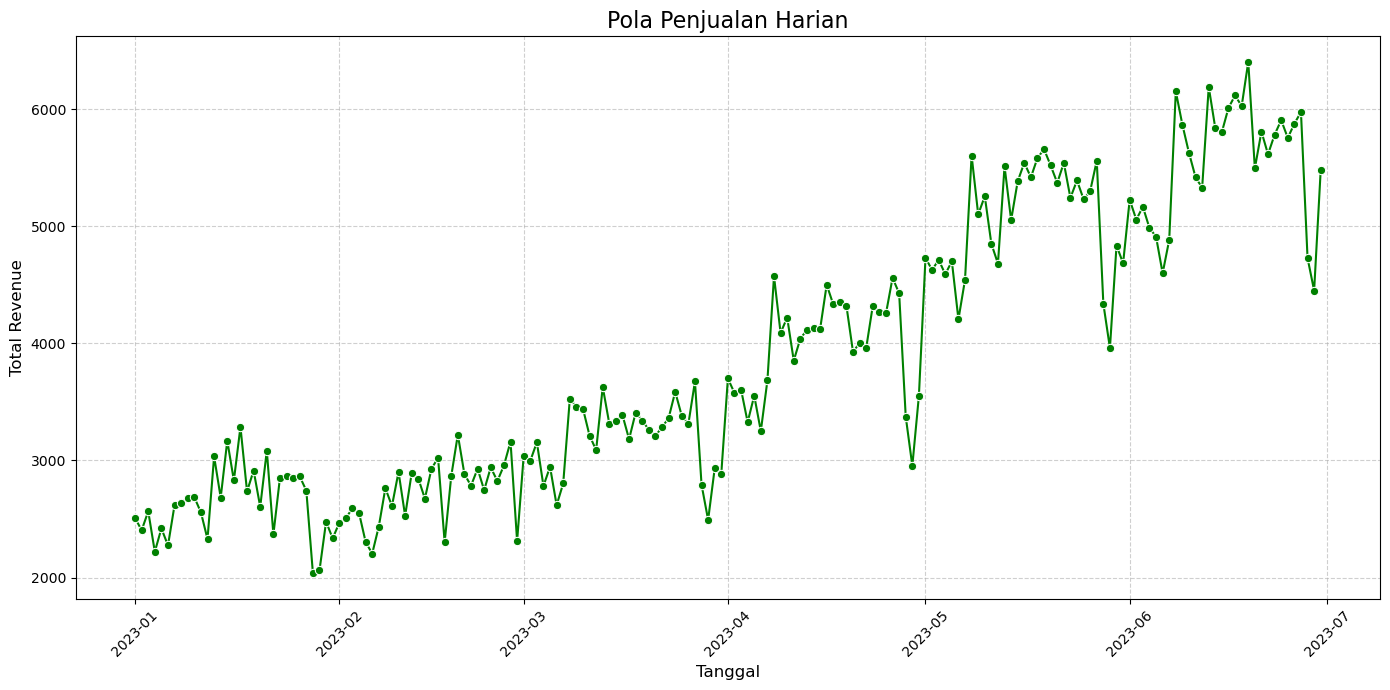

In [36]:
# Plotting data harian
plt.figure(figsize=(14, 7))
sns.lineplot(x='transaction_date', y='total_revenue', data=daily_sales, marker='o', color='green')

# Menambahkan judul dan label
plt.title('Pola Penjualan Harian', fontsize=16)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)  # Memiringkan label tanggal agar lebih mudah dibaca
plt.tight_layout()

# Menampilkan plot
plt.show()

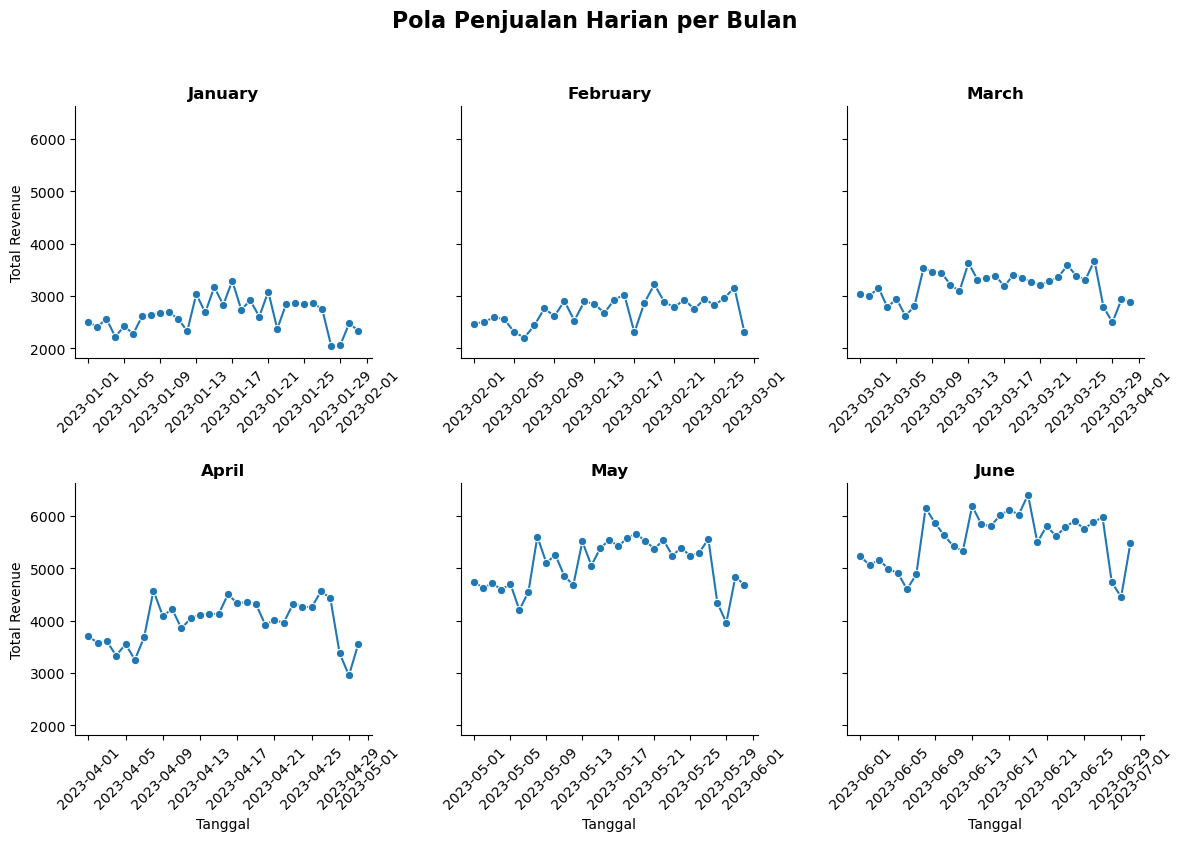

In [37]:
# Menambahkan kolom bulan untuk memisahkan data
daily_sales['month'] = daily_sales['transaction_date'].dt.strftime('%B')  # Nama bulan
daily_sales['month_order'] = daily_sales['transaction_date'].dt.month    # Urutan bulan

# Mengurutkan data berdasarkan urutan bulan
daily_sales = daily_sales.sort_values(by='month_order')

# Plotting menggunakan FacetGrid
g = sns.FacetGrid(daily_sales, col='month', col_wrap=3, sharey=True, sharex=False, height=4)
g.map(sns.lineplot, 'transaction_date', 'total_revenue', marker='o')

# Menambahkan label dan judul untuk setiap plot
g.set_titles("{col_name}", size=12, fontweight='bold')  # Ukuran font lebih besar
g.set_axis_labels("Tanggal", "Total Revenue")
g.fig.suptitle('Pola Penjualan Harian per Bulan', fontsize=16, fontweight='bold')
g.fig.tight_layout(rect=[0, 0, 1, 0.95])  # Memberi ruang untuk judul utama
g.set_xticklabels(rotation=45)

# Menambahkan padding antar subplot
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Menampilkan plot
plt.show()

## FORECASTING SARIMA

In [39]:
from pmdarima import auto_arima
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Memastikan data diurutkan berdasarkan tanggal
daily_sales.set_index('transaction_date', inplace=True)
daily_sales = daily_sales.sort_index()

# Menambahkan kolom untuk akhir bulan dan awal bulan
def is_end_of_month(date):
    # Menandai tanggal 25 hingga 31 sebagai akhir bulan
    return 25 <= date.day <= 31

def is_start_of_month(date):
    # Menandai tanggal 1 hingga 5 sebagai awal bulan
    return 1 <= date.day <= 5

# Menambahkan kolom akhir bulan dan awal bulan
daily_sales['end_of_month'] = daily_sales.index.to_series().apply(is_end_of_month)
daily_sales['start_of_month'] = daily_sales.index.to_series().apply(is_start_of_month)

# Menyusun data pelatihan dan data uji
train_size = int(len(daily_sales) * 0.8)
train_data = daily_sales[:train_size]['total_revenue']
test_data = daily_sales[train_size:]['total_revenue']

# Melatih model SARIMA untuk menangkap seasonality (musiman bulanan)
model = auto_arima(
    train_data,
    seasonal=True,      # Mengaktifkan musiman
    m=30,               # Musiman bulanan (30 hari)
    trace=True,         # Menampilkan proses pencarian parameter
    stepwise=True,      # Menggunakan pendekatan stepwise untuk mencari parameter terbaik
    suppress_warnings=True
)

# Ringkasan model
print(model.summary())

# Prediksi pada data uji
forecast = model.predict(n_periods=len(test_data))

# Membandingkan hasil prediksi dengan data aktual
forecast_index = test_data.index
forecast_series = pd.Series(forecast, index=forecast_index)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[30] intercept   : AIC=inf, Time=4.48 sec
 ARIMA(0,1,0)(0,0,0)[30] intercept   : AIC=2095.400, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[30] intercept   : AIC=2075.901, Time=1.03 sec
 ARIMA(0,1,1)(0,0,1)[30] intercept   : AIC=2061.354, Time=1.13 sec
 ARIMA(0,1,0)(0,0,0)[30]             : AIC=2093.841, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[30] intercept   : AIC=2072.889, Time=0.10 sec
 ARIMA(0,1,1)(1,0,1)[30] intercept   : AIC=2056.379, Time=2.38 sec
 ARIMA(0,1,1)(1,0,0)[30] intercept   : AIC=2058.841, Time=0.96 sec
 ARIMA(0,1,1)(2,0,1)[30] intercept   : AIC=inf, Time=8.96 sec
 ARIMA(0,1,1)(1,0,2)[30] intercept   : AIC=inf, Time=13.20 sec
 ARIMA(0,1,1)(0,0,2)[30] intercept   : AIC=2062.811, Time=8.18 sec
 ARIMA(0,1,1)(2,0,0)[30] intercept   : AIC=2059.715, Time=7.33 sec
 ARIMA(0,1,1)(2,0,2)[30] intercept   : AIC=inf, Time=20.40 sec
 ARIMA(0,1,0)(1,0,1)[30] intercept   : AIC=2094.769, Time=1.48 sec
 ARIMA(1,1,1)(1,0,1)[30] intercept   

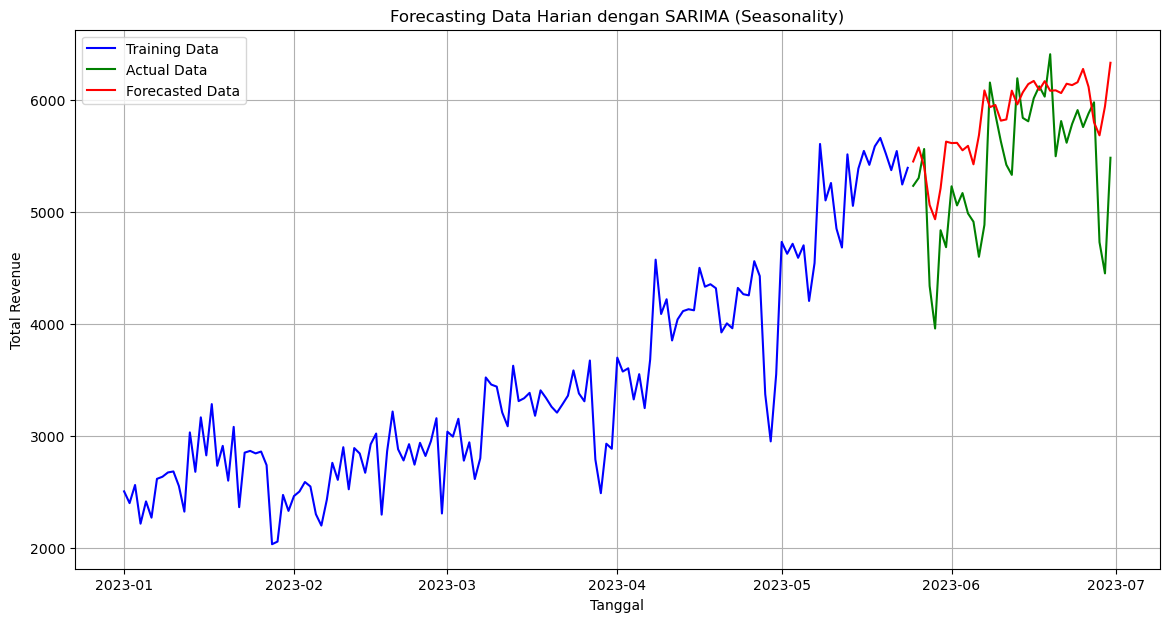

In [40]:
# Visualisasi hasil prediksi vs data aktual
plt.figure(figsize=(14, 7))
plt.plot(train_data, label='Training Data', color='blue')
plt.plot(test_data, label='Actual Data', color='green')
plt.plot(forecast_series, label='Forecasted Data', color='red')
plt.title('Forecasting Data Harian dengan SARIMA (Seasonality)')
plt.xlabel('Tanggal')
plt.ylabel('Total Revenue')
plt.legend()
plt.grid(True)
plt.show()

In [41]:
# Menghitung MAPE dan RMSE untuk evaluasi
mape = np.mean(np.abs((test_data - forecast_series) / test_data)) * 100
print(f"MAPE: {mape:.2f}%")

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test_data, forecast_series))
print(f"RMSE: {rmse:.2f}")

MAPE: 9.48%
RMSE: 586.27


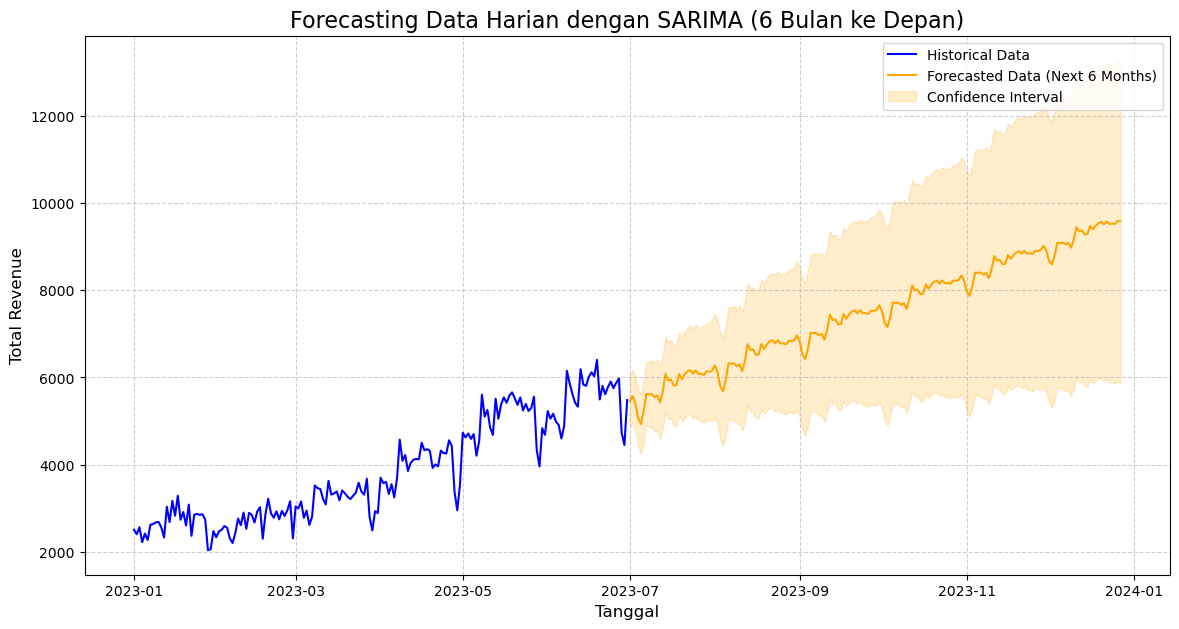

           Forecast Date  Forecasted Revenue  Lower Bound   Upper Bound
2023-05-25    2023-07-01         5447.996236  4867.675921   6028.316551
2023-05-26    2023-07-02         5573.529000  4966.260978   6180.797021
2023-05-27    2023-07-03         5400.975848  4767.906158   6034.045537
2023-05-28    2023-07-04         5060.352123  4402.491945   5718.212301
2023-05-29    2023-07-05         4933.299965  4251.550161   5615.049769
...                  ...                 ...          ...           ...
2023-11-16    2023-12-23         9521.743195  5891.165484  13152.320906
2023-11-17    2023-12-24         9530.438305  5883.935842  13176.940768
2023-11-18    2023-12-25         9519.896155  5857.538184  13182.254127
2023-11-19    2023-12-26         9584.163047  5906.017915  13262.308179
2023-11-20    2023-12-27         9581.752591  5887.887771  13275.617411

[180 rows x 4 columns]


In [42]:
# Melakukan forecasting 6 bulan (180 hari) ke depan dengan interval kepercayaan
forecast_horizon = 180  # 6 bulan = 180 hari
forecast_with_interval = model.predict(n_periods=forecast_horizon, return_conf_int=True)
forecast_values = forecast_with_interval[0]
forecast_intervals = forecast_with_interval[1]

# Membuat indeks untuk tanggal prediksi
last_date = daily_sales.index[-1]  # Tanggal terakhir dalam data
future_dates = pd.date_range(start=last_date, periods=forecast_horizon + 1, freq='D')[1:]  # 180 hari ke depan

# Membuat DataFrame untuk prediksi
forecast_table = pd.DataFrame({
    'Forecast Date': future_dates,
    'Forecasted Revenue': forecast_values,
    'Lower Bound': forecast_intervals[:, 0],
    'Upper Bound': forecast_intervals[:, 1]
})

# Visualisasi hasil prediksi
plt.figure(figsize=(14, 7))
plt.plot(daily_sales['total_revenue'], label='Historical Data', color='blue')
plt.plot(future_dates, forecast_values, label='Forecasted Data (Next 6 Months)', color='orange')
plt.fill_between(future_dates, 
                 forecast_intervals[:, 0], 
                 forecast_intervals[:, 1], 
                 color='orange', alpha=0.2, label='Confidence Interval')
plt.title('Forecasting Data Harian dengan SARIMA (6 Bulan ke Depan)', fontsize=16)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Menampilkan data prediksi
print(forecast_table)

## AUTO ARIMA

In [54]:
print(daily_sales.columns)

Index(['total_revenue', 'month', 'month_order', 'end_of_month',
       'start_of_month'],
      dtype='object')


In [56]:
print(daily_sales.head())

                  total_revenue    month  month_order  end_of_month  \
transaction_date                                                      
2023-01-01              2508.20  January            1         False   
2023-01-02              2403.35  January            1         False   
2023-01-03              2565.00  January            1         False   
2023-01-04              2220.10  January            1         False   
2023-01-05              2418.85  January            1         False   

                  start_of_month  
transaction_date                  
2023-01-01                  True  
2023-01-02                  True  
2023-01-03                  True  
2023-01-04                  True  
2023-01-05                  True  


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2095.400, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2083.350, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2072.889, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2093.841, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2066.800, Time=0.21 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2068.798, Time=0.36 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2068.799, Time=0.38 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2068.129, Time=0.22 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2082.534, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2070.338, Time=0.12 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 2.123 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  144
M

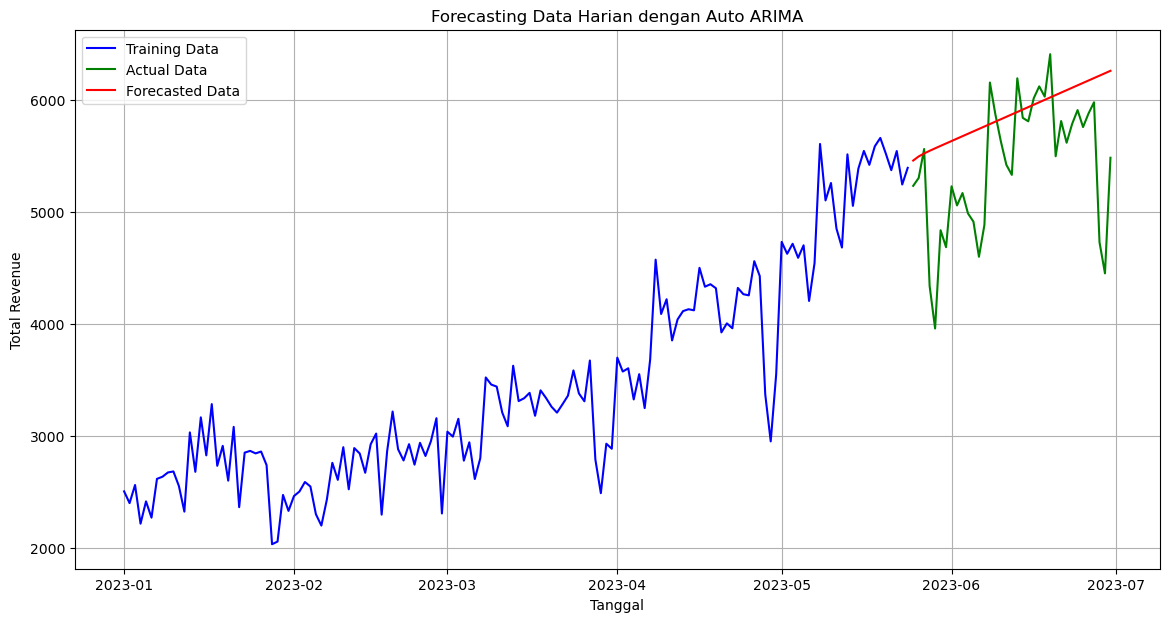

In [58]:
from pmdarima import auto_arima
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Gunakan data harian
#daily_sales.set_index('transaction_date', inplace=True)

# Pastikan data diurutkan berdasarkan tanggal
daily_sales = daily_sales.sort_index()

# Splitting data: 80% untuk training, 20% untuk testing
train_size = int(len(daily_sales) * 0.8)
train_data = daily_sales[:train_size]['total_revenue']
test_data = daily_sales[train_size:]['total_revenue']

# Auto ARIMA untuk model forecasting
model = auto_arima(
    train_data,
    seasonal=False,          # Non-seasonal data
    trace=True,              # Menampilkan proses pencarian parameter
    error_action='ignore',   # Mengabaikan error jika ada
    suppress_warnings=True,  # Menyembunyikan warning
    stepwise=True            # Menggunakan pendekatan stepwise
)

# Ringkasan model
print(model.summary())

# Forecasting pada data test
forecast = model.predict(n_periods=len(test_data))

# Membandingkan hasil prediksi dengan data aktual
forecast_index = test_data.index
forecast_series = pd.Series(forecast, index=forecast_index)

# Plot hasil prediksi vs aktual
plt.figure(figsize=(14, 7))
plt.plot(train_data, label='Training Data', color='blue')
plt.plot(test_data, label='Actual Data', color='green')
plt.plot(forecast_series, label='Forecasted Data', color='red')
plt.title('Forecasting Data Harian dengan Auto ARIMA')
plt.xlabel('Tanggal')
plt.ylabel('Total Revenue')
plt.legend()
plt.grid(True)
plt.show()

In [59]:
mape = np.mean(np.abs((test_data - forecast_series) / test_data)) * 100
print(f"MAPE: {mape:.2f}%")
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test_data, forecast_series))
print(f"RMSE: {rmse:.2f}")

MAPE: 10.67%
RMSE: 687.25


## SARIMAX

In [44]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk mencoba berbagai kombinasi parameter dan mengevaluasi model
def evaluate_sarima_model(train, test, order, seasonal_order):
    # Membuat dan melatih model SARIMA
    model = SARIMAX(train, 
                    order=order, 
                    seasonal_order=seasonal_order, 
                    enforce_stationarity=False, 
                    enforce_invertibility=False)
    model_fit = model.fit(disp=False)
    
    # Prediksi pada data test
    forecast = model_fit.predict(start=test.index[0], end=test.index[-1])
    
    # Hitung RMSE
    rmse = np.sqrt(mean_squared_error(test, forecast))
    
    return rmse, model_fit

# Data training dan testing
train_data = daily_sales[:train_size]['total_revenue']
test_data = daily_sales[train_size:]['total_revenue']

# Grid search untuk parameter SARIMA
p_values = [0, 1]      # AR non-musiman
d_values = [1]         # Differencing non-musiman
q_values = [0, 1]      # MA non-musiman
P_values = [0, 1]      # AR musiman
D_values = [0, 1]      # Differencing musiman
Q_values = [0, 1]      # MA musiman
m_value = 30           # Musiman bulanan (30 hari)

best_rmse = float('inf')
best_order = None
best_seasonal_order = None
best_model = None

# Coba semua kombinasi parameter
for p in p_values:
    for d in d_values:
        for q in q_values:
            for P in P_values:
                for D in D_values:
                    for Q in Q_values:
                        try:
                            order = (p, d, q)
                            seasonal_order = (P, D, Q, m_value)
                            rmse, model_fit = evaluate_sarima_model(train_data, test_data, order, seasonal_order)
                            print(f"Tested SARIMA{order}x{seasonal_order} - RMSE: {rmse:.2f}")
                            if rmse < best_rmse:
                                best_rmse = rmse
                                best_order = order
                                best_seasonal_order = seasonal_order
                                best_model = model_fit
                        except Exception as e:
                            continue

print(f"Best Model: SARIMA{best_order}x{best_seasonal_order} - RMSE: {best_rmse:.2f}")

Tested SARIMA(0, 1, 0)x(0, 0, 0, 30) - RMSE: 579.02


C:\Users\raiha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\raiha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\raiha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\raiha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Tested SARIMA(0, 1, 0)x(0, 0, 1, 30) - RMSE: 510.92


C:\Users\raiha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\raiha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Tested SARIMA(0, 1, 0)x(0, 1, 0, 30) - RMSE: 777.70


C:\Users\raiha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\raiha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\raiha\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Tested SARIMA(0, 1, 0)x(0, 1, 1, 30) - RMSE: 777.70
Tested SARIMA(0, 1, 0)x(1, 0, 0, 30) - RMSE: 506.00


C:\Users\raiha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\raiha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\raiha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\raiha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Tested SARIMA(0, 1, 0)x(1, 0, 1, 30) - RMSE: 505.42


C:\Users\raiha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\raiha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Tested SARIMA(0, 1, 0)x(1, 1, 0, 30) - RMSE: 710.34


C:\Users\raiha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\raiha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\raiha\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Tested SARIMA(0, 1, 0)x(1, 1, 1, 30) - RMSE: 798.43
Tested SARIMA(0, 1, 1)x(0, 0, 0, 30) - RMSE: 579.26


C:\Users\raiha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\raiha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\raiha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\raiha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Tested SARIMA(0, 1, 1)x(0, 0, 1, 30) - RMSE: 540.99


C:\Users\raiha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\raiha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Tested SARIMA(0, 1, 1)x(0, 1, 0, 30) - RMSE: 871.96


C:\Users\raiha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\raiha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\raiha\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Tested SARIMA(0, 1, 1)x(0, 1, 1, 30) - RMSE: 858.05


C:\Users\raiha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\raiha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Tested SARIMA(0, 1, 1)x(1, 0, 0, 30) - RMSE: 549.27


C:\Users\raiha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\raiha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Tested SARIMA(0, 1, 1)x(1, 0, 1, 30) - RMSE: 566.08


C:\Users\raiha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\raiha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Tested SARIMA(0, 1, 1)x(1, 1, 0, 30) - RMSE: 785.32


C:\Users\raiha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\raiha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\raiha\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Tested SARIMA(0, 1, 1)x(1, 1, 1, 30) - RMSE: 890.16
Tested SARIMA(1, 1, 0)x(0, 0, 0, 30) - RMSE: 581.47


C:\Users\raiha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\raiha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\raiha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\raiha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Tested SARIMA(1, 1, 0)x(0, 0, 1, 30) - RMSE: 495.39
Tested SARIMA(1, 1, 0)x(0, 1, 0, 30) - RMSE: 714.90


C:\Users\raiha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\raiha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\raiha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\raiha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\raiha\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn(

Tested SARIMA(1, 1, 0)x(0, 1, 1, 30) - RMSE: 714.90


C:\Users\raiha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\raiha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Tested SARIMA(1, 1, 0)x(1, 0, 0, 30) - RMSE: 478.41


C:\Users\raiha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\raiha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Tested SARIMA(1, 1, 0)x(1, 0, 1, 30) - RMSE: 477.18


C:\Users\raiha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\raiha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Tested SARIMA(1, 1, 0)x(1, 1, 0, 30) - RMSE: 633.87


C:\Users\raiha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\raiha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Tested SARIMA(1, 1, 0)x(1, 1, 1, 30) - RMSE: 738.69
Tested SARIMA(1, 1, 1)x(0, 0, 0, 30) - RMSE: 578.66


C:\Users\raiha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\raiha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\raiha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\raiha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Tested SARIMA(1, 1, 1)x(0, 0, 1, 30) - RMSE: 528.70


C:\Users\raiha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\raiha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Tested SARIMA(1, 1, 1)x(0, 1, 0, 30) - RMSE: 867.98


C:\Users\raiha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\raiha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\raiha\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Tested SARIMA(1, 1, 1)x(0, 1, 1, 30) - RMSE: 846.45


C:\Users\raiha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\raiha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Tested SARIMA(1, 1, 1)x(1, 0, 0, 30) - RMSE: 528.46


C:\Users\raiha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\raiha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Tested SARIMA(1, 1, 1)x(1, 0, 1, 30) - RMSE: 527.59


C:\Users\raiha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\raiha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Tested SARIMA(1, 1, 1)x(1, 1, 0, 30) - RMSE: 776.44


C:\Users\raiha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\raiha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\raiha\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Tested SARIMA(1, 1, 1)x(1, 1, 1, 30) - RMSE: 878.57
Best Model: SARIMA(1, 1, 0)x(1, 0, 1, 30) - RMSE: 477.18


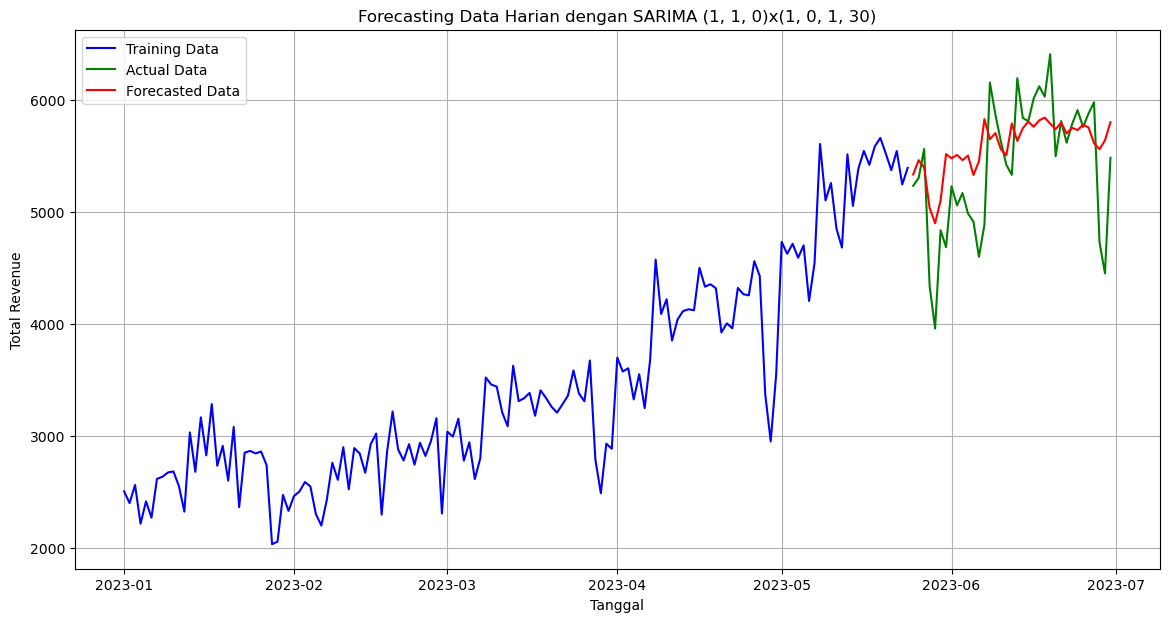

In [45]:
# Plot hasil prediksi vs aktual untuk model terbaik
forecast = best_model.predict(start=test_data.index[0], end=test_data.index[-1])

plt.figure(figsize=(14, 7))
plt.plot(train_data, label='Training Data', color='blue')
plt.plot(test_data, label='Actual Data', color='green')
plt.plot(forecast, label='Forecasted Data', color='red')
plt.title(f"Forecasting Data Harian dengan SARIMA {best_order}x{best_seasonal_order}")
plt.xlabel('Tanggal')
plt.ylabel('Total Revenue')
plt.legend()
plt.grid(True)
plt.show()

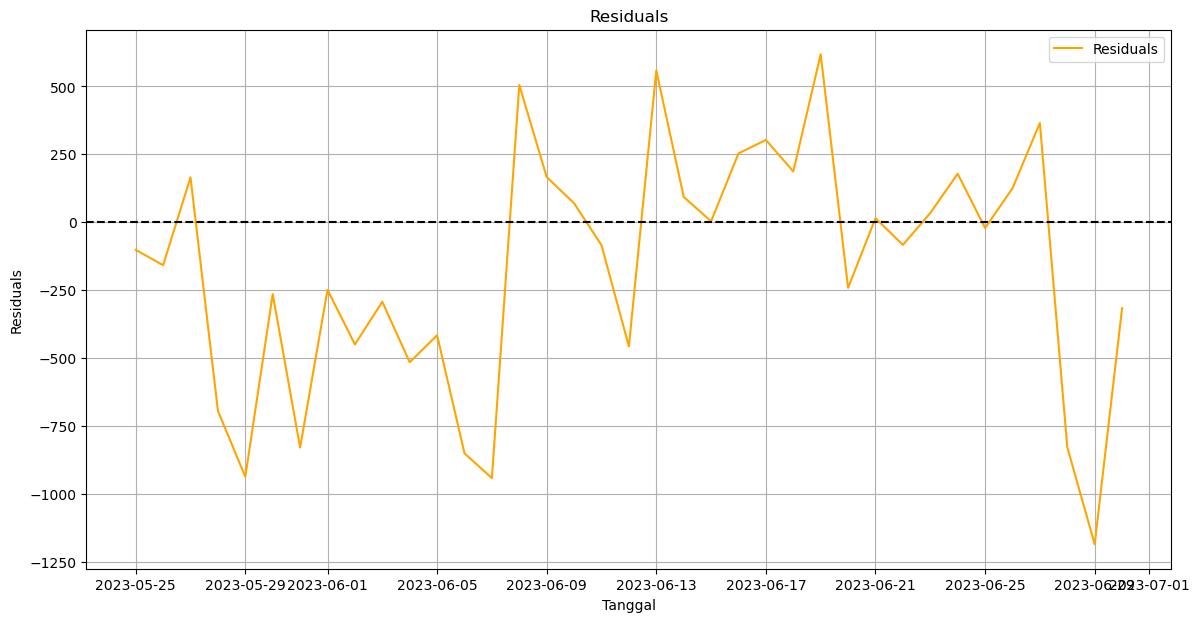

In [46]:
# Evaluasi residual
residuals = test_data - forecast

plt.figure(figsize=(14, 7))
plt.plot(residuals, label='Residuals', color='orange')
plt.axhline(y=0, color='black', linestyle='--')
plt.title("Residuals")
plt.xlabel("Tanggal")
plt.ylabel("Residuals")
plt.legend()
plt.grid(True)
plt.show()

In [47]:
# Metrik evaluasi
mape = np.mean(np.abs(residuals / test_data)) * 100
print(f"MAPE: {mape:.2f}%")
rmse = np.sqrt(mean_squared_error(test_data, forecast))
print(f"RMSE: {rmse:.2f}")

MAPE: 7.30%
RMSE: 477.18


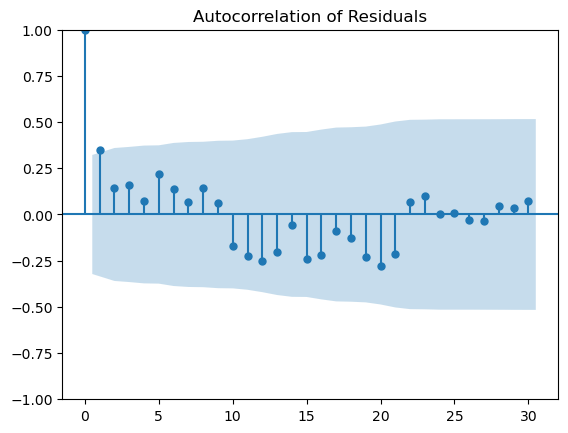

In [48]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot ACF untuk residual
plot_acf(residuals, lags=30)
plt.title("Autocorrelation of Residuals")
plt.show()

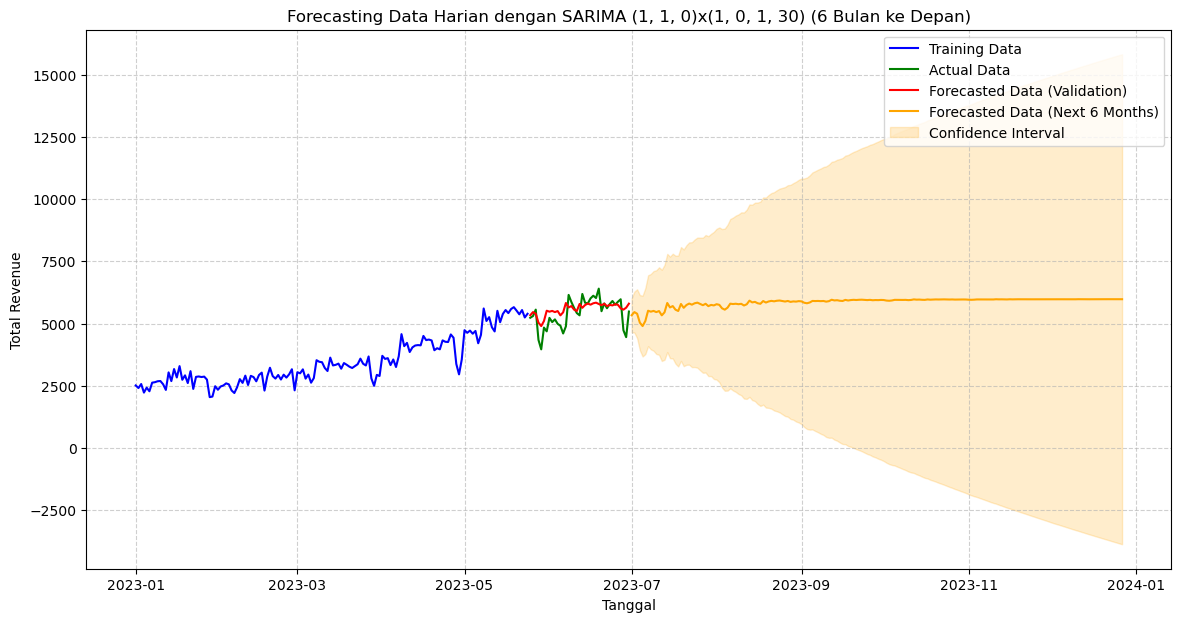

           Forecast Date  Forecasted Revenue  Lower Bound   Upper Bound
2023-05-25    2023-07-01         5332.768074  4651.730808   6013.805340
2023-05-26    2023-07-02         5459.281409  4634.202317   6284.360501
2023-05-27    2023-07-03         5393.957894  4411.250933   6376.664855
2023-05-28    2023-07-04         5033.350388  3925.121370   6141.579406
2023-05-29    2023-07-05         4897.065121  3673.283406   6120.846837
...                  ...                 ...          ...           ...
2023-11-16    2023-12-23         5977.481343 -3749.000948  15703.963634
2023-11-17    2023-12-24         5977.040963 -3782.495757  15736.577682
2023-11-18    2023-12-25         5977.554832 -3814.924742  15770.034406
2023-11-19    2023-12-26         5976.701642 -3848.610333  15802.013618
2023-11-20    2023-12-27         5977.144843 -3880.890186  15835.179872

[180 rows x 4 columns]


In [49]:
# Prediksi masa depan (6 bulan ke depan - 180 hari)
forecast_horizon = 180  # 6 bulan = 180 hari
forecast_future = best_model.get_forecast(steps=forecast_horizon)
forecast_mean_future = forecast_future.predicted_mean
forecast_ci_future = forecast_future.conf_int()

# Membuat indeks untuk tanggal prediksi
last_date = test_data.index[-1]  # Tanggal terakhir dalam data uji
future_dates = pd.date_range(start=last_date, periods=forecast_horizon + 1, freq='D')[1:]  # 180 hari ke depan

# Visualisasi hasil prediksi dengan confidence interval
plt.figure(figsize=(14, 7))
plt.plot(train_data, label='Training Data', color='blue')
plt.plot(test_data, label='Actual Data', color='green')
plt.plot(forecast, label='Forecasted Data (Validation)', color='red')
plt.plot(future_dates, forecast_mean_future, label='Forecasted Data (Next 6 Months)', color='orange')
plt.fill_between(future_dates, 
                 forecast_ci_future.iloc[:, 0], 
                 forecast_ci_future.iloc[:, 1], 
                 color='orange', alpha=0.2, label='Confidence Interval')
plt.title(f"Forecasting Data Harian dengan SARIMA {best_order}x{best_seasonal_order} (6 Bulan ke Depan)")
plt.xlabel('Tanggal')
plt.ylabel('Total Revenue')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Membuat tabel hasil prediksi
forecast_table = pd.DataFrame({
    'Forecast Date': future_dates,
    'Forecasted Revenue': forecast_mean_future,
    'Lower Bound': forecast_ci_future.iloc[:, 0],
    'Upper Bound': forecast_ci_future.iloc[:, 1]
})

# Menampilkan tabel prediksi
print(forecast_table)